<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/Regression-sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scikit-learnを利用した線形回帰


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline

np.random.seed(9876789)

収率データの読み込みとプロット

In [ ]:
data = np.loadtxt("https://raw.githubusercontent.com/namoshi/ml_intro/master/syuritu.dat", comments="#")

print('data=', data)

x = data[:,0]

y = data[:,1]

print('x=', x)
print('y=', y)

plt.plot(x,y,'.')
plt.show()

単回帰分析

In [ ]:
X = []
for i in range(len(x)):
    X.append([x[i]])
X = np.array(X)
print('X\n',X)
print('y\n',y)

# Create linear regression object
regr = linear_model.LinearRegression()

regr.fit(X, y)

# predictions
y_pred = regr.predict(X)
print('predicted y\n', y_pred)
print('predicted errors\n', y - y_pred)


print('\n===== Model ====')
# Coeff
print('coef=',regr.coef_, 'intercept=', regr.intercept_)

# R^2
print('R^2=', regr.score(X, y))

回帰直線の表示

In [ ]:
plt.plot(x,y,'.')
max_x = np.max(x)
min_x = np.min(x)

# model
#beta = regr.coef_
#print('Coeffs=', beta)
xx = np.linspace(min_x, max_x, 100)
XX = []
for i in range(len(xx)):
    XX.append([xx[i]])
XX = np.array(XX)
yy = regr.predict(XX)
plt.plot(xx, yy)
plt.title('Linear Regression (Syuritu)')
plt.savefig("linreg_syuritu.eps")
plt.show()

## 重回帰分析

マンションの広さと築年数から価格（千万円）を推定するためのモデルを重回帰分析を用いて構築

マンションデータの読み込み

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
data = np.loadtxt("https://raw.githubusercontent.com/namoshi/ml_intro/master/condo.dat", comments="#")

print('data=', data)

x = data[:,:2]

y = data[:,2]

print('x\n', x)
print('y\n', y)

重回帰分析

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

print('y\n', y)
# predictions
y_pred = regr.predict(x)
print('predicted price\n', y_pred)
print('prediction errors\n', y - y_pred)

print('\n===== Model ====')
#
# Coeff
print('coef=',regr.coef_)
print('intercept=', regr.intercept_)

# R^2
print('R^2=', regr.score(x, y))

## ボール投げのデータの重回帰分析

握力，体重，身長からボール投げの記録を推定するモデルを重回帰分析を用いて構築


データの読み込み

In [ ]:
data = np.loadtxt("https://raw.githubusercontent.com/namoshi/ml_intro/master/ball.dat", comments="#")

print('data\n', data)

x = data[:,1:]

y = data[:,0]

print('x\n', x)
print('y\n', y)

重回帰分析

In [ ]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(x, y)

print('y\n', y)
# predictions
y_pred = regr.predict(x)
print('predicted y\n', y_pred)
print('errors\n', y - y_pred)

print('\n===== Model ====')
#
# Coeff
print('coef=',regr.coef_)
print('intercept=', regr.intercept_)

# R^2
print('R^2=', regr.score(x, y))

## 多項式回帰

サイン関数にノイズを付加したデータに対する多項式回帰の当てはめ

サイン関数にノイズを付加したデータの生成

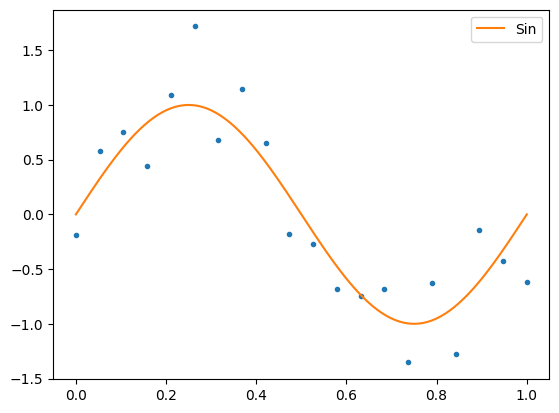

In [16]:
%matplotlib inline
import math
nsample = 20
err = np.random.normal(size=nsample)/3.0
x = np.linspace(0.0, 1.0, nsample)
y = np.sin(2*math.pi*x) + err

# plot samples
plt.plot(x,y,'.')

# plot graph of sin(x)
xx = np.linspace(0.0, 1.0, 200)
plt.plot(xx,np.sin(2*math.pi*xx), label="Sin")
plt.legend()
plt.show()


多項式回帰（３次）

In [17]:
X = np.column_stack((x, x**2, x**3))
print('X', X)

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X, y)

# predictions
y_pred = regr.predict(X)
print(y_pred)

#
# Coeff
print('coef=',regr.coef_)
print('intercept=', regr.intercept_)

X [[0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.26315789e-02 2.77008310e-03 1.45793847e-04]
 [1.05263158e-01 1.10803324e-02 1.16635078e-03]
 [1.57894737e-01 2.49307479e-02 3.93643388e-03]
 [2.10526316e-01 4.43213296e-02 9.33080624e-03]
 [2.63157895e-01 6.92520776e-02 1.82242309e-02]
 [3.15789474e-01 9.97229917e-02 3.14914711e-02]
 [3.68421053e-01 1.35734072e-01 5.00072897e-02]
 [4.21052632e-01 1.77285319e-01 7.46464499e-02]
 [4.73684211e-01 2.24376731e-01 1.06283715e-01]
 [5.26315789e-01 2.77008310e-01 1.45793847e-01]
 [5.78947368e-01 3.35180055e-01 1.94051611e-01]
 [6.31578947e-01 3.98891967e-01 2.51931768e-01]
 [6.84210526e-01 4.68144044e-01 3.20309083e-01]
 [7.36842105e-01 5.42936288e-01 4.00058318e-01]
 [7.89473684e-01 6.23268698e-01 4.92054235e-01]
 [8.42105263e-01 7.09141274e-01 5.97171599e-01]
 [8.94736842e-01 8.00554017e-01 7.16285173e-01]
 [9.47368421e-01 8.97506925e-01 8.50269719e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[-0.10737113  0.41201976  0.76566444 

結果の表示

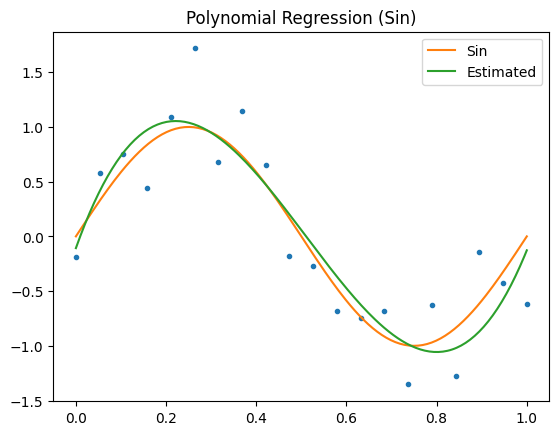

In [18]:
# plot samples
plt.plot(x,y,'.')

# plot graph of sin(x)
xx = np.linspace(0.0, 1.0, 200)
plt.plot(xx,np.sin(2*math.pi*xx), label="Sin")

XX = np.column_stack((xx, xx**2, xx**3))
yy = regr.predict(XX)
plt.plot(xx, yy, label="Estimated")
plt.legend()
plt.title('Polynomial Regression (Sin)')
plt.savefig("polyreg_sin_qubic.eps")
plt.show()
